# 01 - EDA
Exploration des classes et aperçus d'images.

In [10]:
from pathlib import Path
import sys
import random
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from PIL import Image
# R?solution robuste de la racine du repo
ROOT = Path.cwd().resolve()
for _ in range(4):
    if (ROOT / 'Data').exists():
        break
    ROOT = ROOT.parent
sys.path.append(str(ROOT))
TRAIN_DIR = ROOT / 'Data/raw/train'
VAL_DIR = ROOT / 'Data/raw/val'
TEST_DIR = ROOT / 'Data/raw/test'
CLASSES = ['Chao', 'Ervas', 'Milho', 'Milho_ervas']


In [11]:
# Comptage par classe sur train/val/test
for split_name, split_dir in [('train', TRAIN_DIR), ('val', VAL_DIR), ('test', TEST_DIR)]:
    counts = {cls: len(list((split_dir/cls).glob('*'))) for cls in CLASSES}
    print(split_name, counts)


train {'Chao': 6134, 'Ervas': 6015, 'Milho': 6255, 'Milho_ervas': 6040}
val {'Chao': 646, 'Ervas': 668, 'Milho': 695, 'Milho_ervas': 670}
test {'Chao': 101, 'Ervas': 100, 'Milho': 100, 'Milho_ervas': 100}


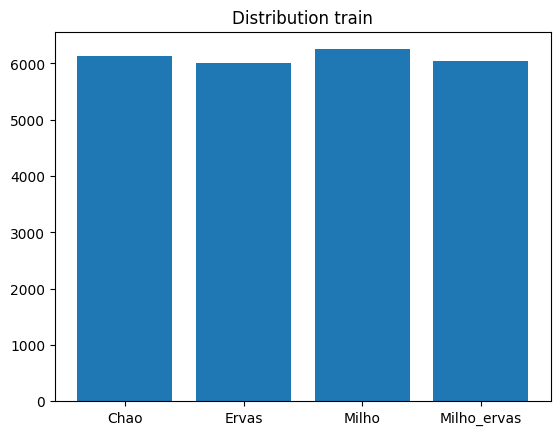

In [12]:
# Distribution graphique (train)
counts = {cls: len(list((TRAIN_DIR/cls).glob('*'))) for cls in CLASSES}
plt.bar(counts.keys(), counts.values())
plt.title('Distribution train')
plt.show()


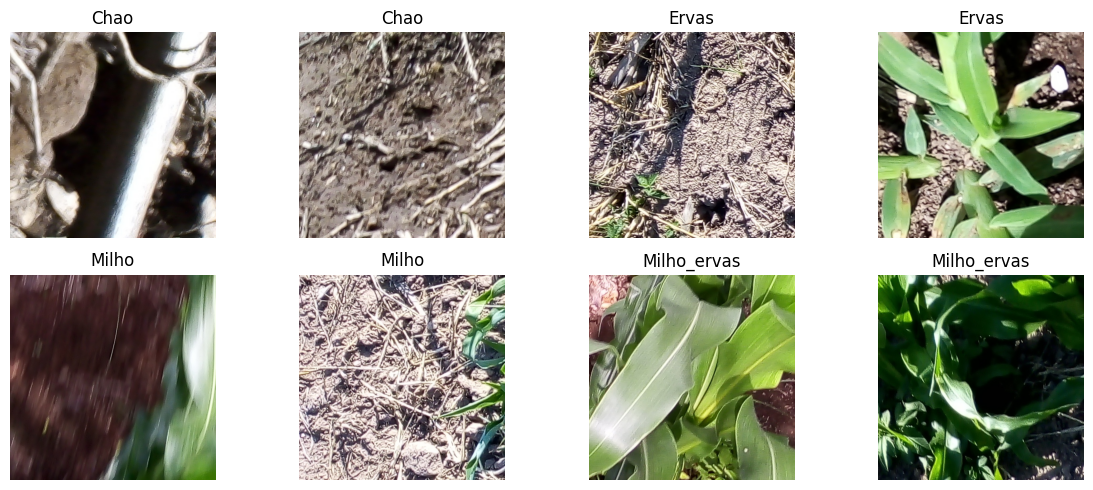

In [13]:
# Aper?u de quelques images al?atoires
sample_paths = []
for cls in CLASSES:
    files = list((TRAIN_DIR/cls).glob('*.jpg'))
    random.shuffle(files)
    sample_paths.extend(files[:2])

fig, axes = plt.subplots(2, max(1, len(sample_paths)//2), figsize=(12, 5))
for ax, img_path in zip(axes.flatten(), sample_paths):
    ax.imshow(Image.open(img_path))
    ax.set_title(img_path.parent.name)
    ax.axis('off')
plt.tight_layout()
plt.show()
